Images loaded successfully!
Resizing image2 from (331, 389) to (318, 389)
Mean values for Image 1:
BGR (RGB) Mean: [144.21643951 132.72858968 146.50675818 255.        ]
Grayscale Mean: 137.73118462110557
YUV Mean: [137.29326122 121.11453331 108.61716868]
HSV Mean: [  0.         148.40779454 255.        ]

Mean values for Image 2:
BGR (RGB) Mean: [141.45975813 123.71630208 123.70032821 255.        ]
Grayscale Mean: 129.01611938368012
YUV Mean: [128.57658728 128.99786584  98.84262178]
HSV Mean: [3.41142423e-03 1.51862395e+02 2.55000000e+02]

Mean differences between Image 1 and Image 2:
BGR (RGB) Mean Difference: [ 2.75668138  9.01228759 22.80642997  0.        ]
Grayscale Mean Difference: 8.71506523742545
YUV Mean Difference: [8.71667394 7.88333252 9.77454689]
HSV Mean Difference: [3.41142423e-03 3.45460057e+00 0.00000000e+00]


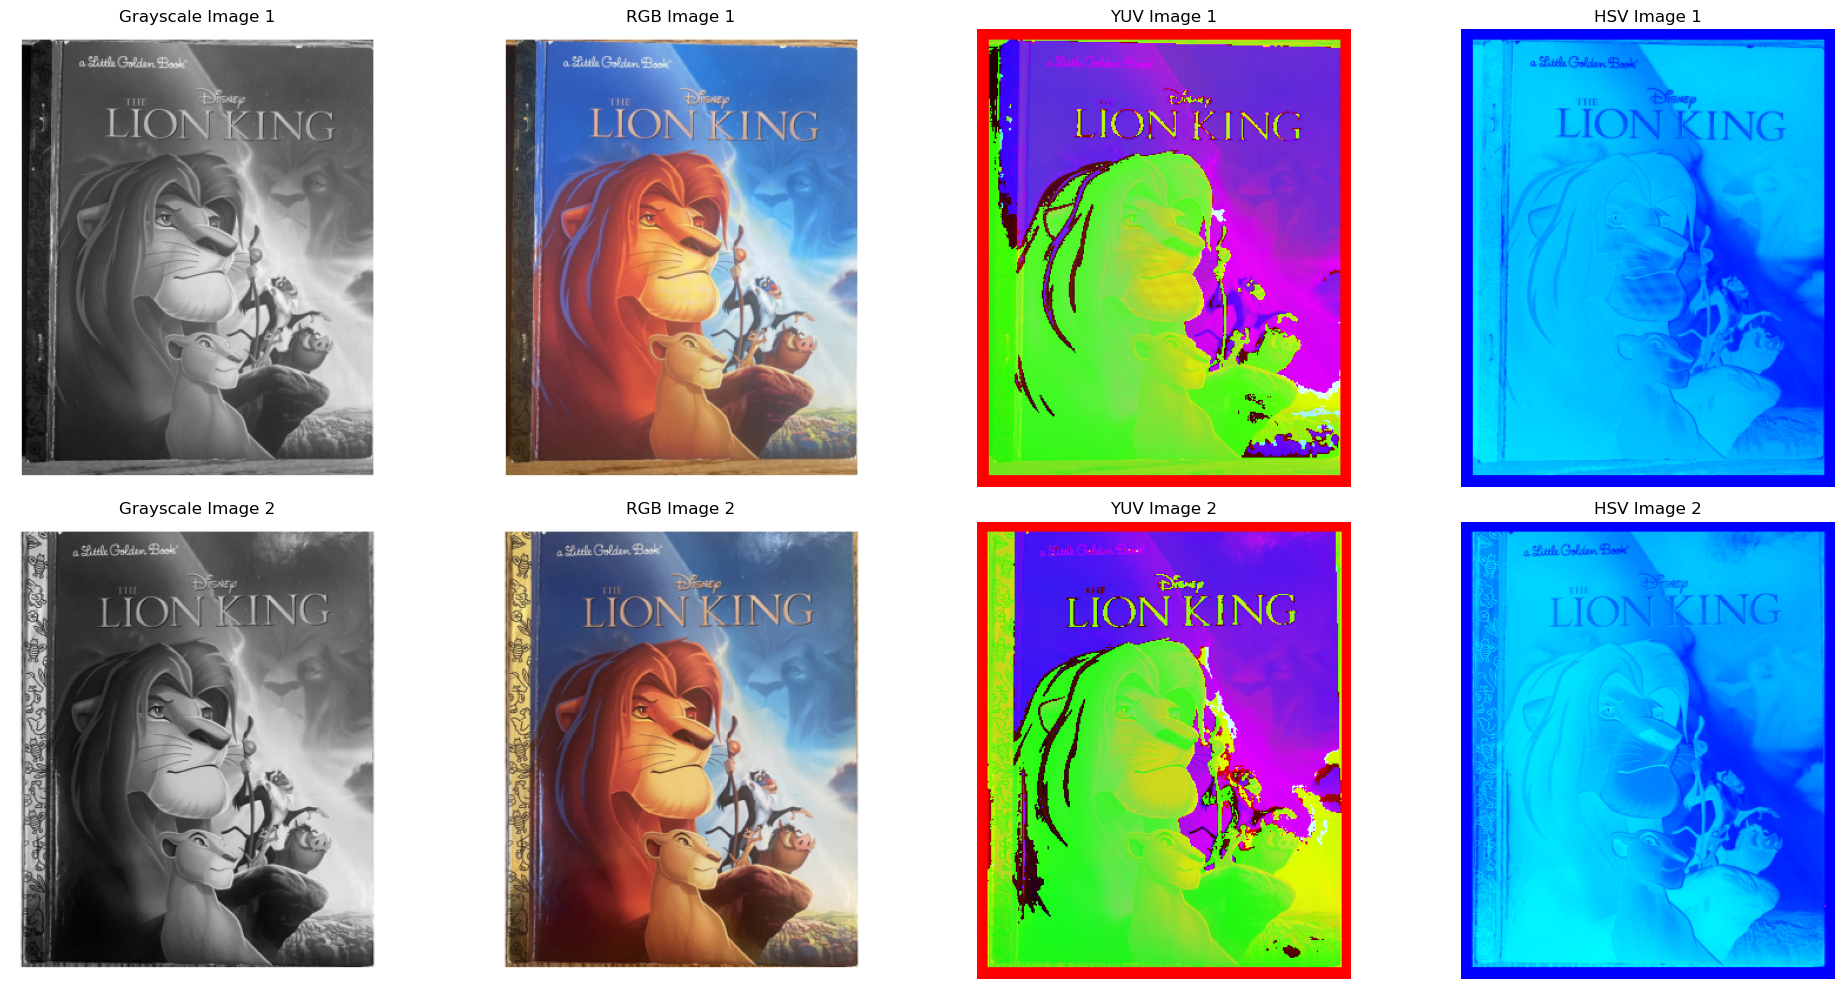

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the images
try:
    image1 = Image.open(r"C:\Users\Keerthana R\Pictures\Saved Pictures\New folder\image1.png")
    image2 = Image.open(r"C:\Users\Keerthana R\Pictures\Saved Pictures\New folder\image2.png")
    print("Images loaded successfully!")
except Exception as e:
    print(f"Error loading images: {e}")

# Ensure both images are the same size (resize if necessary)
if image1.size != image2.size:
    print(f"Resizing image2 from {image2.size} to {image1.size}")
    image2 = image2.resize(image1.size)

# Function to compute mean of an image in each color space
def calculate_mean(image_array):
    return np.mean(image_array, axis=(0, 1))  # Mean across height and width

# Convert images to numpy arrays for BGR (RGB in Pillow)
image1_bgr = np.array(image1)
image2_bgr = np.array(image2)

# Calculate mean for BGR (RGB) images
mean_bgr_image1 = calculate_mean(image1_bgr)
mean_bgr_image2 = calculate_mean(image2_bgr)

# Convert to Grayscale
gray_image1 = image1.convert('L')
gray_image2 = image2.convert('L')

# Convert grayscale images to numpy arrays and calculate mean
gray_image1_array = np.array(gray_image1)
gray_image2_array = np.array(gray_image2)
mean_gray_image1 = np.mean(gray_image1_array)
mean_gray_image2 = np.mean(gray_image2_array)

# Convert to YUV (manually)
def rgb_to_yuv(image):
    img_array = np.array(image)
    R = img_array[:, :, 0]
    G = img_array[:, :, 1]
    B = img_array[:, :, 2]

    Y = 0.299 * R + 0.587 * G + 0.114 * B
    U = -0.14713 * R - 0.28886 * G + 0.436 * B
    V = 0.615 * R - 0.51499 * G - 0.10001 * B

    yuv_image = np.stack([Y, U, V], axis=-1).astype(np.uint8)
    return yuv_image

yuv_image1 = rgb_to_yuv(image1)
yuv_image2 = rgb_to_yuv(image2)

# Calculate mean for YUV images
mean_yuv_image1 = calculate_mean(yuv_image1)
mean_yuv_image2 = calculate_mean(yuv_image2)

# Convert to HSV (manually)
def rgb_to_hsv(image):
    img_array = np.array(image) / 255.0  # Normalize to 0-1 range
    R = img_array[:, :, 0]
    G = img_array[:, :, 1]
    B = img_array[:, :, 2]

    max_val = np.max(img_array, axis=2)
    min_val = np.min(img_array, axis=2)
    delta = max_val - min_val

    H = np.zeros_like(max_val)
    S = np.zeros_like(max_val)
    V = max_val

    # Hue calculation
    mask = delta != 0
    R_eq_max = (max_val == R) & mask
    G_eq_max = (max_val == G) & mask
    B_eq_max = (max_val == B) & mask

    H[R_eq_max] = (60 * ((G[R_eq_max] - B[R_eq_max]) / delta[R_eq_max]) + 360) % 360
    H[G_eq_max] = (60 * ((B[G_eq_max] - R[G_eq_max]) / delta[G_eq_max]) + 120) % 360
    H[B_eq_max] = (60 * ((R[B_eq_max] - G[B_eq_max]) / delta[B_eq_max]) + 240) % 360

    # Saturation calculation
    S[max_val != 0] = delta[max_val != 0] / max_val[max_val != 0]

    hsv_image = np.stack([H, S, V], axis=-1) * 255.0  # Convert back to 0-255 range
    return hsv_image.astype(np.uint8)

hsv_image1 = rgb_to_hsv(image1)
hsv_image2 = rgb_to_hsv(image2)

# Calculate mean for HSV images
mean_hsv_image1 = calculate_mean(hsv_image1)
mean_hsv_image2 = calculate_mean(hsv_image2)

# Compute absolute differences between means of the two images
mean_diff_bgr = np.abs(mean_bgr_image1 - mean_bgr_image2)
mean_diff_gray = np.abs(mean_gray_image1 - mean_gray_image2)
mean_diff_yuv = np.abs(mean_yuv_image1 - mean_yuv_image2)
mean_diff_hsv = np.abs(mean_hsv_image1 - mean_hsv_image2)

# Display the calculated means and comparisons
print(f"Mean values for Image 1:")
print(f"BGR (RGB) Mean: {mean_bgr_image1}")
print(f"Grayscale Mean: {mean_gray_image1}")
print(f"YUV Mean: {mean_yuv_image1}")
print(f"HSV Mean: {mean_hsv_image1}")

print(f"\nMean values for Image 2:")
print(f"BGR (RGB) Mean: {mean_bgr_image2}")
print(f"Grayscale Mean: {mean_gray_image2}")
print(f"YUV Mean: {mean_yuv_image2}")
print(f"HSV Mean: {mean_hsv_image2}")

print(f"\nMean differences between Image 1 and Image 2:")
print(f"BGR (RGB) Mean Difference: {mean_diff_bgr}")
print(f"Grayscale Mean Difference: {mean_diff_gray}")
print(f"YUV Mean Difference: {mean_diff_yuv}")
print(f"HSV Mean Difference: {mean_diff_hsv}")

# Plotting the images using matplotlib
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Image 1: Grayscale, RGB, YUV, HSV
axes[0, 0].imshow(gray_image1, cmap='gray')
axes[0, 0].set_title('Grayscale Image 1')
axes[0, 0].axis('off')

axes[0, 1].imshow(np.array(image1))
axes[0, 1].set_title('RGB Image 1')
axes[0, 1].axis('off')

axes[0, 2].imshow(yuv_image1)
axes[0, 2].set_title('YUV Image 1')
axes[0, 2].axis('off')

axes[0, 3].imshow(hsv_image1)
axes[0, 3].set_title('HSV Image 1')
axes[0, 3].axis('off')

# Image 2: Grayscale, RGB, YUV, HSV
axes[1, 0].imshow(gray_image2, cmap='gray')
axes[1, 0].set_title('Grayscale Image 2')
axes[1, 0].axis('off')

axes[1, 1].imshow(np.array(image2))
axes[1, 1].set_title('RGB Image 2')
axes[1, 1].axis('off')

axes[1, 2].imshow(yuv_image2)
axes[1, 2].set_title('YUV Image 2')
axes[1, 2].axis('off')

axes[1, 3].imshow(hsv_image2)
axes[1, 3].set_title('HSV Image 2')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()
